<a href="https://colab.research.google.com/github/atinsinghal97/dv-marketing-profiles/blob/master/DV_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_file = '/content/drive/MyDrive/Colab- Datasets/DV/adult.data'

# Data collection

In [ ]:
column_name= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
adult_data = pd.read_csv(data_file,names = column_name,header=None)
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning

In [ ]:
non_int_columns = adult_data.select_dtypes(exclude=["number"]).columns
adult_data[non_int_columns] = adult_data[non_int_columns].applymap(lambda x: x.strip())

## REMOVE ROWS WITH ? CHARACTER AS VALUE FOR FEATURE

In [ ]:
for col in adult_data:
    if len(adult_data[adult_data[col] == '?']) > 0:
        print("Identified column witn ? character :",col)
        adult_data = adult_data[adult_data[col] != '?']
        
adult_data

Identified column witn ? character : workclass
Identified column witn ? character : occupation
Identified column witn ? character : native-country


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Correlation

In [ ]:
correlation_data = adult_data.copy()
categorical_columns = adult_data.select_dtypes(exclude=["number"]).columns.tolist()
for i in categorical_columns:
    correlation_data[i] = correlation_data[i].astype('category').cat.codes

# 1. HEAT MAP

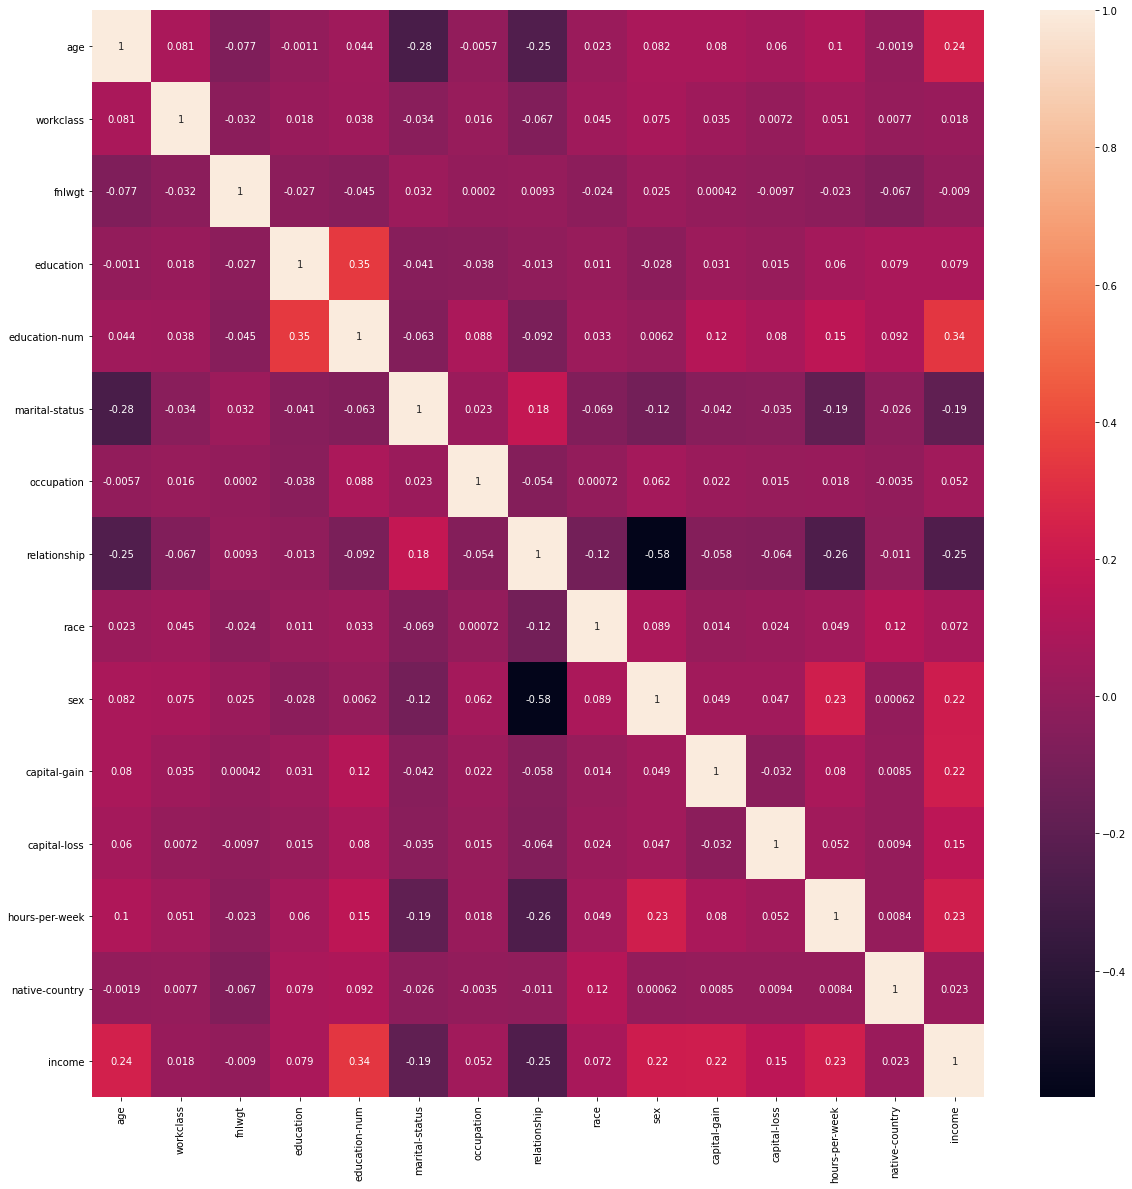

In [ ]:
plt.rcParams['font.size'] = 10.0
plt.figure(figsize=(20,20))
sns.heatmap(correlation_data.corr(),annot=True)
plt.show()


# Finding features which have highest correlation with Income

In [ ]:
correlation_data.corr()['income'].sort_values(ascending=False)

income            1.000000
education-num     0.335286
age               0.241998
hours-per-week    0.229480
capital-gain      0.221196
sex               0.216699
capital-loss      0.150053
education         0.078987
race              0.071658
occupation        0.051577
native-country    0.023268
workclass         0.018044
fnlwgt           -0.008957
marital-status   -0.193518
relationship     -0.251003
Name: income, dtype: float64

**Features selected to explore:** education-num, age, hours-per-week, capital-gain, sex, education, workclass, marital-status, relationship

# 2. CORRELATION MATRIX

<Figure size 1080x1080 with 0 Axes>

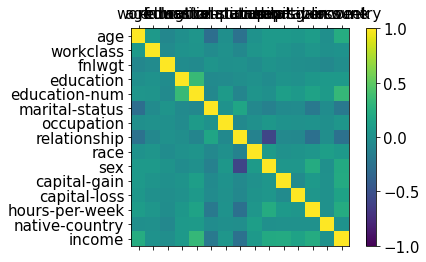

In [ ]:
correlations = correlation_data.corr()
plt.rcParams['font.size'] = 15.0
plt.figure(figsize=(15,15))
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='nearest')
fig.colorbar(cax)
ticks = np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(column_name,size = 15)
ax.set_yticklabels(column_name,size = 15)
plt.show()

# 3. SCATTER PLOT

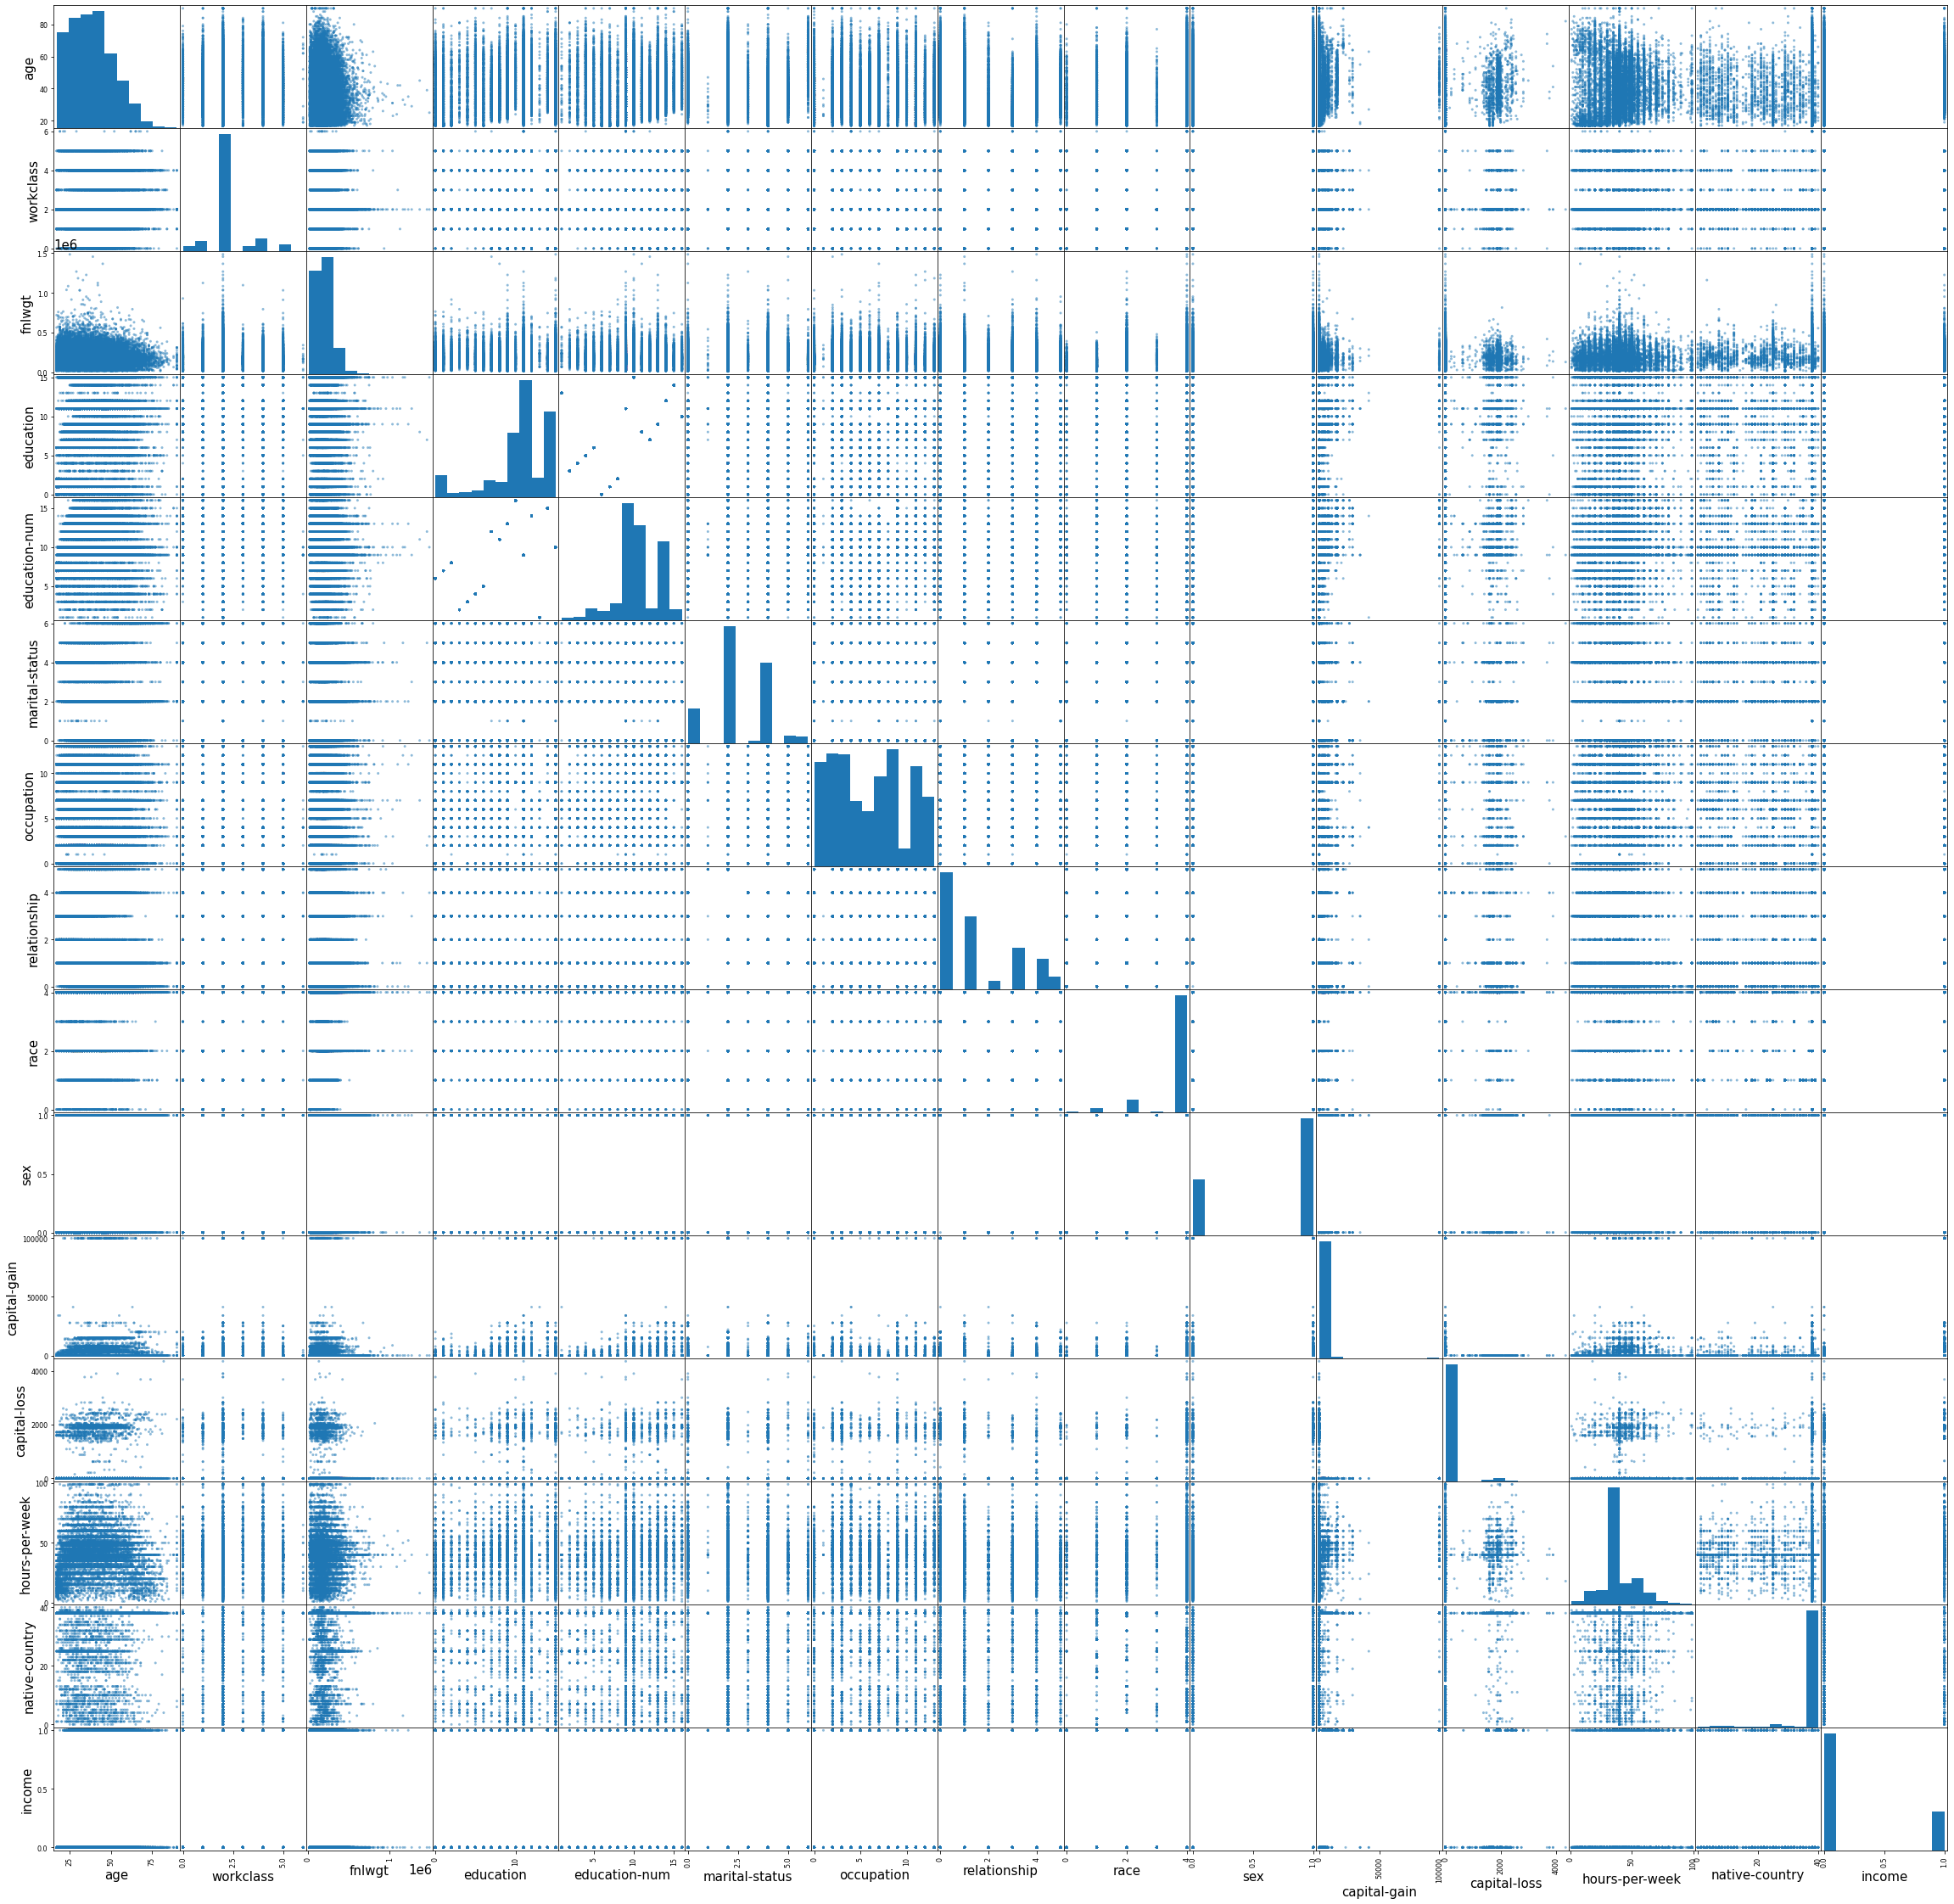

In [ ]:
plt.rcParams["figure.figsize"]=40,40
scatter_matrix(correlation_data)
plt.show()

In [ ]:
correlation_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


# RELATIONSHIP V/S INCOME

---



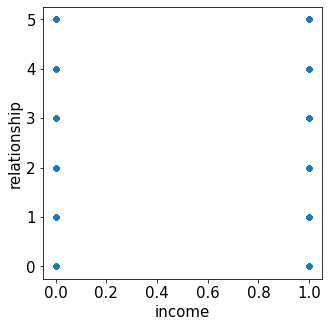

In [ ]:
# magnified scatter plot for income v/s relationship
correlation_data.plot.scatter(x='income', y='relationship', figsize = (5,5))

In [ ]:
# splitting df based on income

relationship_df_0 = correlation_data[correlation_data['income'] == 0]
relationship_df_0 = relationship_df_0[['income', 'relationship']]

relationship_df_1 = correlation_data[correlation_data['income'] == 1]
relationship_df_1 = relationship_df_1[['income', 'relationship']]

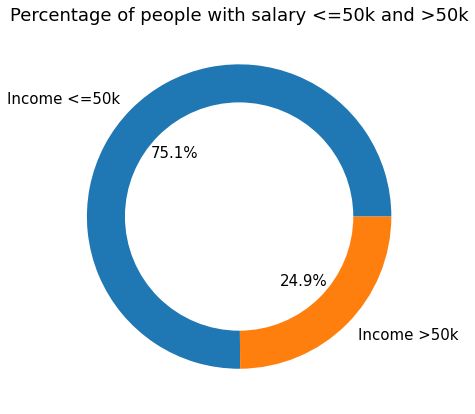

In [ ]:
income_labels = ['Income <=50k', 'Income >50k']
income_count = [relationship_df_0.shape[0], relationship_df_1.shape[0]]

fig = plt.figure(figsize=(10,7))
plt.pie(income_count,labels=income_labels,autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of people with salary <=50k and >50k')
plt.show()

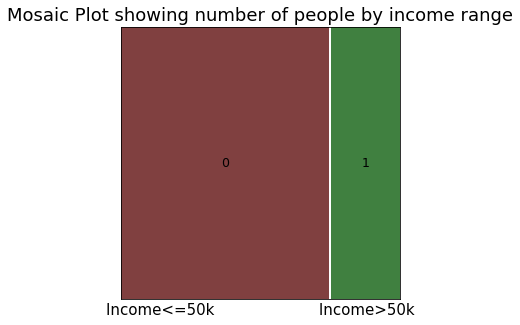

Legend: 
0: Income<=50k 
1: Income>50k


In [ ]:
plt.rcParams["figure.figsize"]=(5,5)
mosaic(income_count, axes_label=False)
plt.title('Mosaic Plot showing number of people by income range')
plt.xlabel('Income<=50k                      Income>50k')
plt.show()
print("Legend: \n0: Income<=50k \n1: Income>50k")

**Inference:** Most of the people make <= 50k per year

In [ ]:
relationship_mapping = dict(enumerate(adult_data['relationship'].astype('category').cat.categories))
# relationship_labels = [0, 1, 2, 3, 4, 5]

count_by_relationship_0 = [relationship_df_0[relationship_df_0['relationship'] == 0].shape[0], 
                           relationship_df_0[relationship_df_0['relationship'] == 1].shape[0], 
                           relationship_df_0[relationship_df_0['relationship'] == 2].shape[0], 
                           relationship_df_0[relationship_df_0['relationship'] == 3].shape[0], 
                           relationship_df_0[relationship_df_0['relationship'] == 4].shape[0],
                           relationship_df_0[relationship_df_0['relationship'] == 5].shape[0]
                           ]

count_by_relationship_1 = [relationship_df_1[relationship_df_1['relationship'] == 0].shape[0], 
                           relationship_df_1[relationship_df_1['relationship'] == 1].shape[0], 
                           relationship_df_1[relationship_df_1['relationship'] == 2].shape[0], 
                           relationship_df_1[relationship_df_1['relationship'] == 3].shape[0], 
                           relationship_df_1[relationship_df_1['relationship'] == 4].shape[0],
                           relationship_df_1[relationship_df_1['relationship'] == 5].shape[0]
                           ]

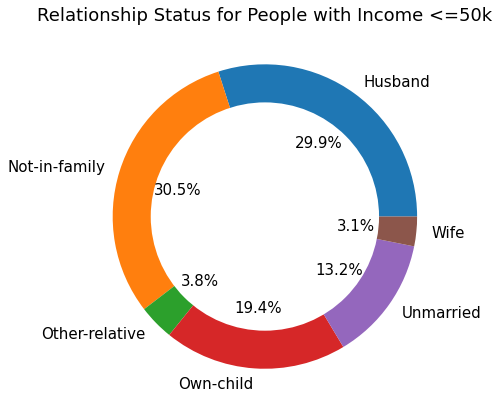

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.pie(count_by_relationship_0,labels=relationship_mapping.values(),autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship Status for People with Income <=50k')
plt.show()

**Inference:** Most of the people earning <= 50k are either husbands or not in a family.

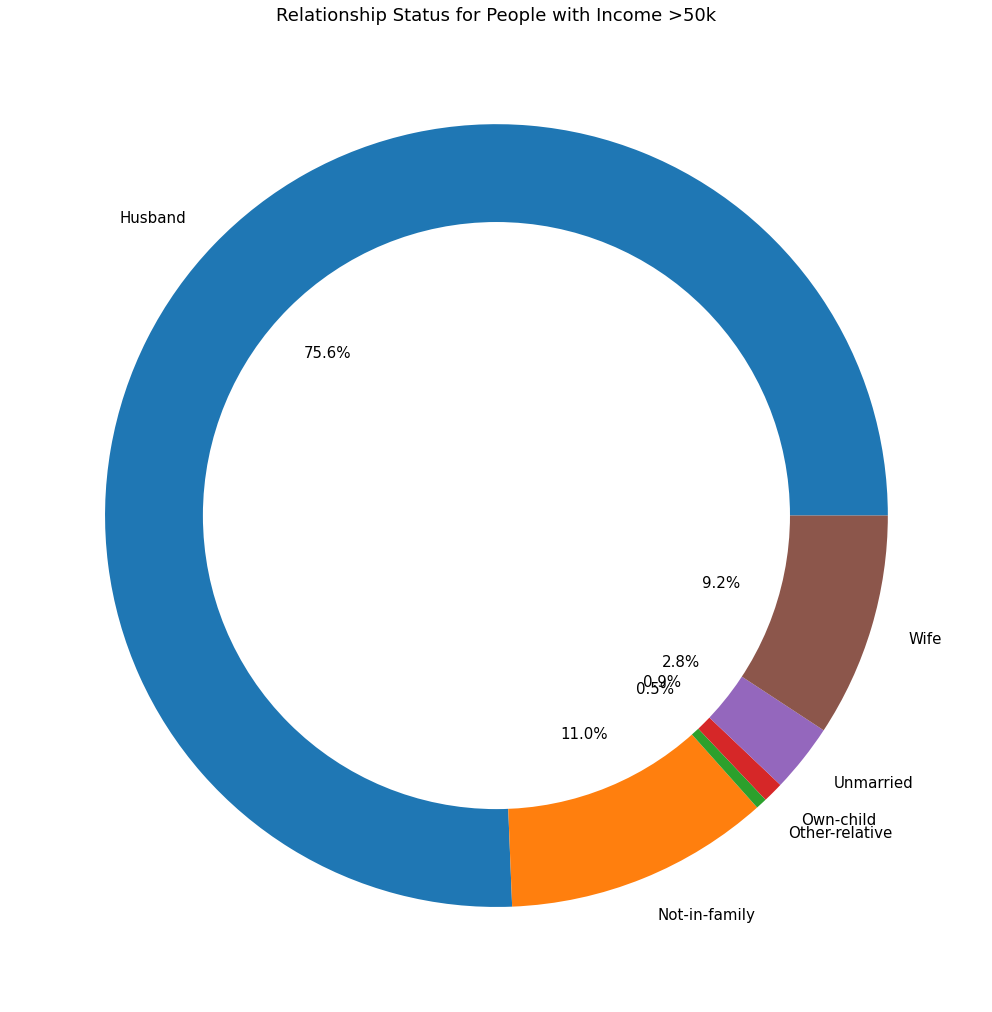

In [ ]:
fig = plt.figure(figsize=(20,18))
plt.pie(count_by_relationship_1,labels=relationship_mapping.values(),autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship Status for People with Income >50k')
# plt.legend()
plt.show()

**Inference:** More than 3/4th of the people making > 50k are husbands.

# EDUCATION-NUM V/S INCOME

---



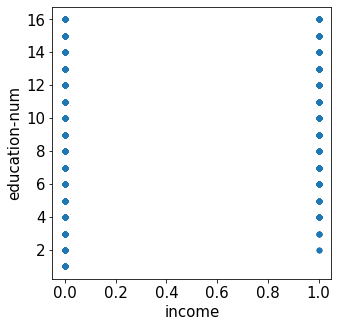

In [ ]:
# magnified scatter plot for income v/s education-num
correlation_data.plot.scatter(x='income', y='education-num', figsize = (5,5))
plt.show()

In [ ]:
# splitting df based on income

ednum_df_0 = correlation_data[correlation_data['income'] == 0]
ednum_df_0 = ednum_df_0[['income', 'education-num']]

ednum_df_1 = correlation_data[correlation_data['income'] == 1]
ednum_df_1 = ednum_df_1[['income', 'education-num']]

Education-num with Salary <= 50k


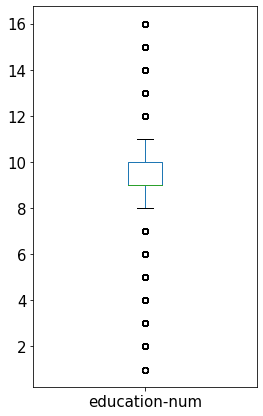

In [ ]:
print("Education-num with Salary <= 50k")
ednum_df_0['education-num'].plot.box(figsize = (4,7));

**Inference:** Most people with salary <= 50k have education-num between 8 and 11

Education-num with Salary > 50k


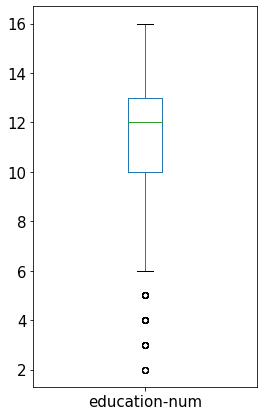

In [ ]:
print("Education-num with Salary > 50k")
ednum_df_1['education-num'].plot.box(figsize = (4,7));

**Inference:** Most people with salary > 50k have education-num between X and Y

In [ ]:
ednum_all = dict(correlation_data['education-num'].value_counts())
ednum_0 = dict(ednum_df_0['education-num'].value_counts()) # salary <=50k
ednum_1 = dict(ednum_df_1['education-num'].value_counts()) # salary >50k

# adding missing keys for salary > 50k
for key in ednum_all.keys():
  if ednum_all[key]-ednum_0[key] == 0:
    ednum_1[key] = 0

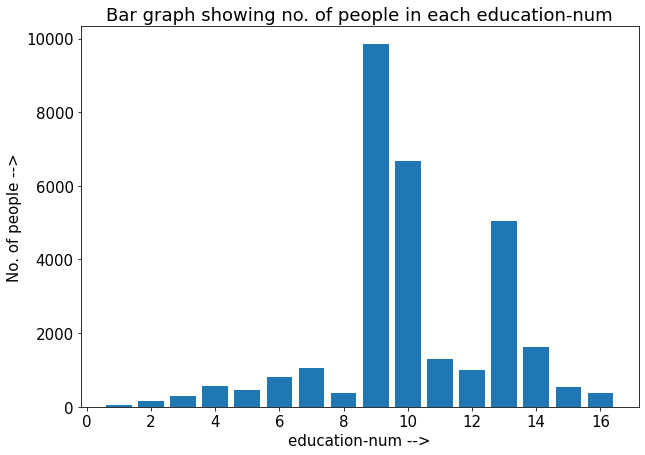

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.bar(ednum_all.keys(), ednum_all.values())
plt.title('Bar graph showing no. of people in each education-num')
plt.xlabel('education-num -->')
plt.ylabel('No. of people -->')
plt.show()

**Inference:** 9, 10 and 13 are the most common education-num in the given dataset.

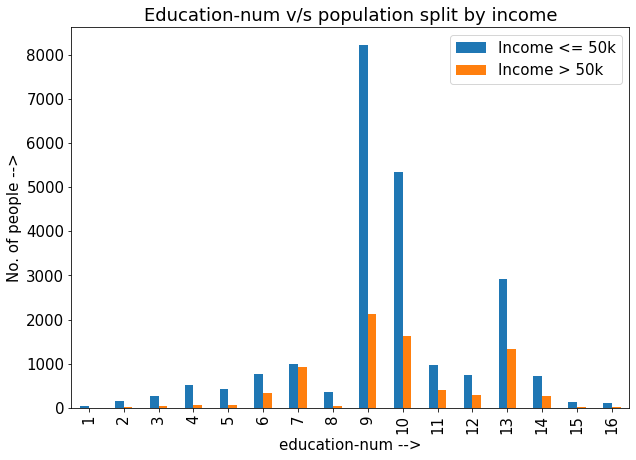

In [ ]:
ednum_df = pd.DataFrame(list(zip(ednum_0.values(), ednum_1.values())), columns =['Income <= 50k', 'Income > 50k'], index=ednum_0.keys()).sort_index()
ednum_df.plot.bar(figsize = (10,7))
plt.title('Education-num v/s population split by income')
plt.xlabel('education-num -->')
plt.ylabel('No. of people -->')
plt.show()

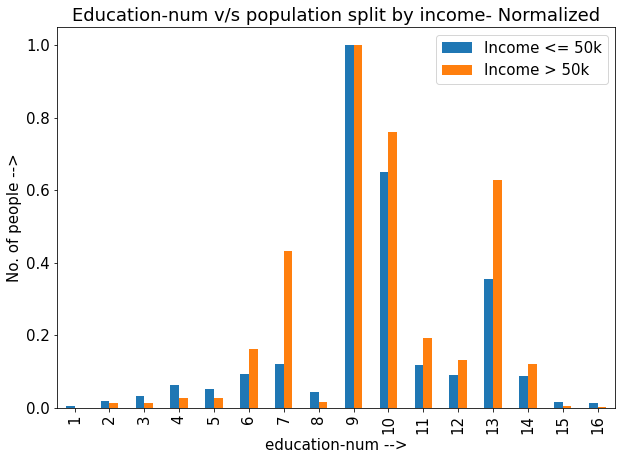

In [ ]:
ednum_df_normalized = ednum_df.apply(lambda x: x / x.max())
ednum_df_normalized.plot.bar(figsize = (10,7))
plt.title('Education-num v/s population split by income- Normalized')
plt.xlabel('education-num -->')
plt.ylabel('No. of people -->')
plt.show()

**Inference:** After normalizing the data, we see that the percentage of people in each education-num is almost similar for most of them. The previous graph showed the actual number, which is less as the data is not balanced, i.e. the number of people making <=50k is a lot more (75.1%) than people making >50k (24.9%)